I6079633 Jan Schmidt

In [ ]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score 
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
dtc = DecisionTreeClassifier(criterion='entropy')
knc = KNeighborsClassifier()
gnb = GaussianNB()
lor = LogisticRegression()
svc = SVC(kernel='linear')

In [ ]:
#some preprocessing algorithms
#spit the last coloum from the array 
def splitClassData(dataframe, splitpoint = -1):
  npArray = dataframe.to_numpy()
  npAShape = npArray.shape

  if splitpoint == -1:
    splitpoint = npAShape[1]-1

  X = npArray[:,:splitpoint]
  y = npArray[:,splitpoint]
  return X,y

#Confusion map for the model
def draw_confusion_matrix(ax,model,X,y,cv,):
  class_names = ['False', 'True']

  Y_pred = cross_val_predict(model, X, y, cv=cv)  
  conf_mat = confusion_matrix(y, Y_pred) 

  im = ax.imshow(conf_mat,cmap='Greens')

  ax.set_xticklabels(class_names)
  ax.set_xticks(np.arange(len(class_names)))

  ax.set_yticklabels(class_names)
  ax.set_yticks(np.arange(len(class_names)))

  for i in range(len(class_names)):
    for j in range(len(class_names)):
        text = ax.text(j, i, conf_mat[i, j], color="black")

  cvs = cross_val_score(model, X, y, cv=10)
  ax.set_xlabel("accuracy: %0.2f    deviation: %0.2f" % (cvs.mean(), cvs.std()))
  return ax;

# **Task 1.1**

(a)

In [ ]:
df_e1a = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp1a.csv')
df_e1b = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp1b.csv')
df_e1c = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp1c.csv')

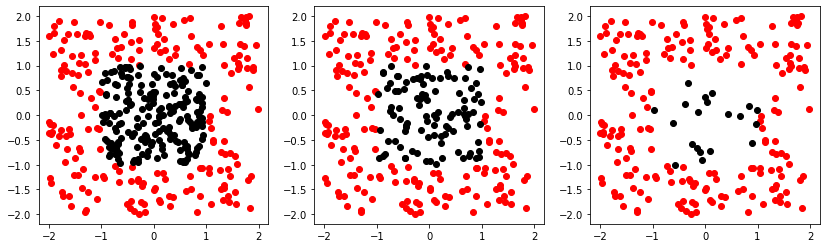

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
ax1.scatter(df_e1a['x'][df_e1a['class'] < 0],df_e1a['y'][df_e1a['class'] < 0],color='red')
ax1.scatter(df_e1a['x'][df_e1a['class'] > 0],df_e1a['y'][df_e1a['class'] > 0],color='black');
ax2.scatter(df_e1b['x'][df_e1b['class'] < 0],df_e1b['y'][df_e1b['class'] < 0],color='red')
ax2.scatter(df_e1b['x'][df_e1b['class'] > 0],df_e1b['y'][df_e1b['class'] > 0],color='black');
ax3.scatter(df_e1c['x'][df_e1c['class'] < 0],df_e1c['y'][df_e1c['class'] < 0],color='red')
ax3.scatter(df_e1c['x'][df_e1c['class'] > 0],df_e1c['y'][df_e1c['class'] > 0],color='black');

Each file pesents the same thing. The only difference is in the datapoints with a possitiv class. They differ in the amount as well as the individual coordinates. 

In [ ]:
(b)

In [ ]:
X_a, y_a = splitClassData(df_e1a,2)
X_b, y_b = splitClassData(df_e1b,2)
X_c, y_c = splitClassData(df_e1c,2)

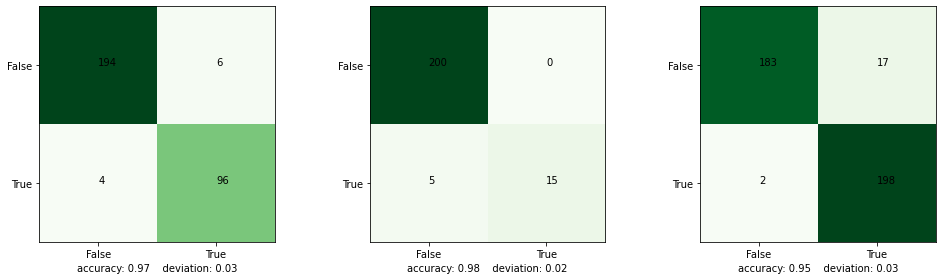

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

knc = KNeighborsClassifier()
knc.fit(X_a,y_a)
draw_confusion_matrix(ax1, knc, X_b, y_b, cv=10)

knc = KNeighborsClassifier()
knc.fit(X_b,y_b)
draw_confusion_matrix(ax2,knc, X_c, y_c, cv=10)

knc = KNeighborsClassifier()
knc.fit(X_c,y_c)
draw_confusion_matrix(ax3,knc, X_a, y_a, cv=10)

fig.tight_layout()
plt.show()

To test the results I took the data of a different file (b for a, c for b and a for c). The results with a mean accuracy of 0.95 are good. 
The results are mostly the same:


*   Accuracy and deviation are th same in all 3 examples
*   Only a small difference can bee seen in the confusion matrix, but this most liky comes from the differen destibutions of positiv and negativ classes



(c)

for the following task I used exp1c.csv for training and exp1a.csv for testing (normaly it should be the otherway round, but this way I can grand more unkown examples to test)

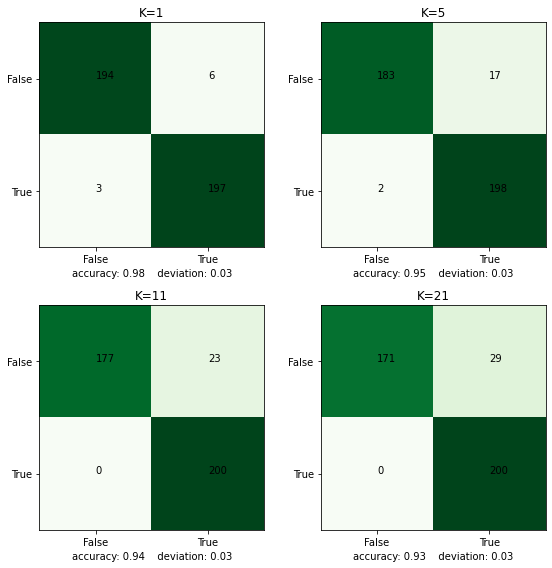

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(X_c,y_c)
axs[0,0].set_title('K=1')
draw_confusion_matrix(axs[0,0], knc, X_a, y_a, cv=10)

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(X_c,y_c)
axs[0,1].set_title('K=5')
draw_confusion_matrix(axs[0,1], knc, X_a, y_a, cv=10)

knc = KNeighborsClassifier(n_neighbors=11)
knc.fit(X_c,y_c)
axs[1,0].set_title('K=11')
draw_confusion_matrix(axs[1,0], knc, X_a, y_a, cv=10)

knc = KNeighborsClassifier(n_neighbors=21)
knc.fit(X_c,y_c)
axs[1,1].set_title('K=21')
draw_confusion_matrix(axs[1,1], knc, X_a, y_a, cv=10)

fig.tight_layout()
plt.show()

k=1 returns the pest accuracy results. For higher k there is a small decrease of the accuracy which becomes less noticeable steps the higher k becomes.

*   From k = 1 to k = 5 the decease is 0.03
*   From k = 5 to k = 11 the decease is 0.01
*   From k = 11 to k = 21 the decease is 0.01



This can be due to overfitting


(d)

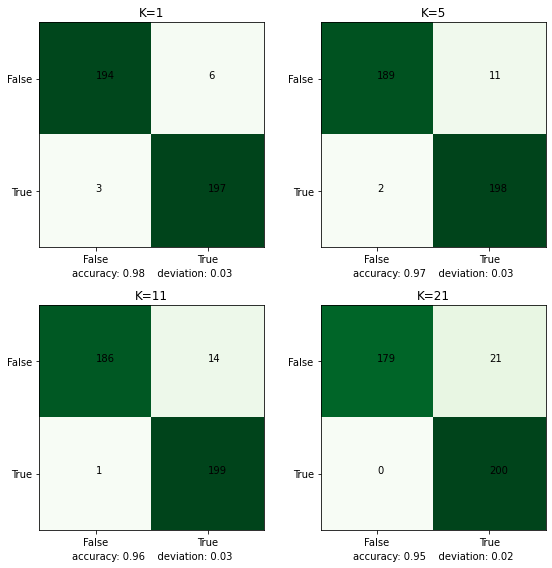

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

knc = KNeighborsClassifier(n_neighbors=1,weights ='distance')
knc.fit(X_c,y_c)
axs[0,0].set_title('K=1')
draw_confusion_matrix(axs[0,0], knc, X_a, y_a, cv=10)

knc = KNeighborsClassifier(n_neighbors=5,weights ='distance')
knc.fit(X_c,y_c)
axs[0,1].set_title('K=5')
draw_confusion_matrix(axs[0,1], knc, X_a, y_a, cv=10)

knc = KNeighborsClassifier(n_neighbors=11,weights ='distance')
knc.fit(X_c,y_c)
axs[1,0].set_title('K=11')
draw_confusion_matrix(axs[1,0], knc, X_a, y_a, cv=10)

knc = KNeighborsClassifier(n_neighbors=21,weights ='distance')
knc.fit(X_c,y_c)
axs[1,1].set_title('K=21')
draw_confusion_matrix(axs[1,1], knc, X_a, y_a, cv=10)

fig.tight_layout()
plt.show()

k=1 still returns the best accuracy results. For higher k there is a small decrease of the accuracy. But it is not as bad as in the prior test. The improvment becomes more noticeable the higher k becomes.

*   From k = 1 to k = 5 the decease is 0.01
*   From k = 5 to k = 11 the decease is 0.01
*   From k = 11 to k = 21 the decease is 0.01

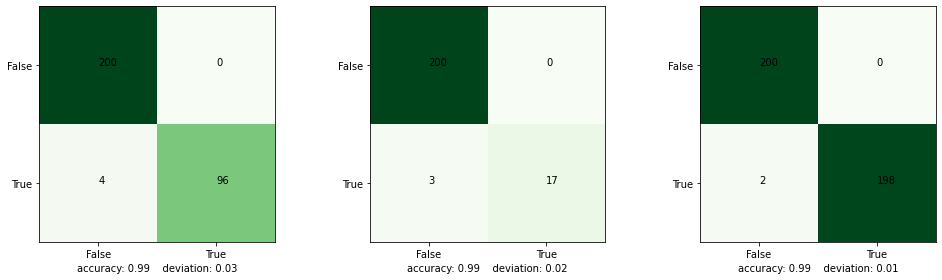

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_a,y_a)
draw_confusion_matrix(ax1, dtc, X_b, y_b, cv=10)

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_b,y_b)
draw_confusion_matrix(ax2, dtc, X_c, y_c, cv=10)

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(X_c,y_c)
draw_confusion_matrix(ax3, dtc, X_a, y_a, cv=10)

fig.tight_layout()
plt.show()

The Decision Tree Classifier has about the accuracy as the K Neighbors Classifier, but in the confursion matrix the results are noticible better.
The DTC has only a few false prediction when it should have been true.

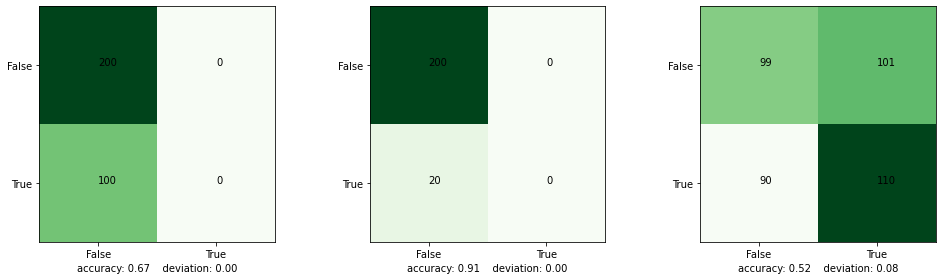

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

lor = LogisticRegression()
lor.fit(X_a,y_a)
draw_confusion_matrix(ax1, lor, X_b, y_b, cv=10)

lor = LogisticRegression()
lor.fit(X_b,y_b)
draw_confusion_matrix(ax2, lor,  X_c, y_c, cv=10)

lor = LogisticRegression()
lor.fit(X_c,y_c)
draw_confusion_matrix(ax3, lor, X_a, y_a, cv=10)

fig.tight_layout()
plt.show()

Here it is the other way ound the confusion matrix shows a lot of false predictions when using Logistic Regression

# **Task 1.2**

In [ ]:
df_e2a = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp2a.csv')
df_e2b = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp2b.csv')

In [ ]:
X_a, y_a = splitClassData(df_e2a)
X_b, y_b = splitClassData(df_e2b)

trainX_a, testX_a, trainy_a, testy_a = train_test_split(X_a, y_a, test_size=0.1, random_state=42)
trainX_b, testX_b, trainy_b, testy_b = train_test_split(X_b, y_b, test_size=0.1, random_state=42)

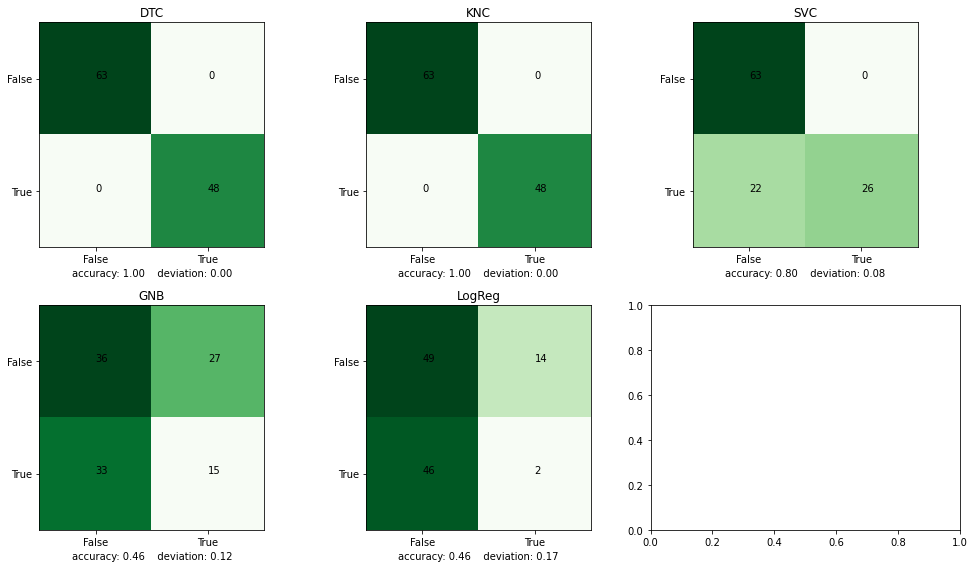

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(14, 8))

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(trainX_a,trainy_a)
axs[0,0].set_title('DTC')
draw_confusion_matrix(axs[0,0],dtc, testX_a, testy_a, cv=10)

knc = KNeighborsClassifier()
knc.fit(trainX_a,trainy_a)
axs[0,1].set_title('KNC')
draw_confusion_matrix(axs[0,1], knc, testX_a, testy_a, cv=10)

gnb = GaussianNB()
gnb.fit(trainX_a,trainy_a)
axs[1,0].set_title('GNB')
draw_confusion_matrix(axs[1,0], gnb, testX_a, testy_a, cv=10)

lor = LogisticRegression()
lor.fit(trainX_a,trainy_a)
axs[1,1].set_title('LogReg')
draw_confusion_matrix(axs[1,1], lor, testX_a, testy_a, cv=10)

svc = SVC(kernel='linear')
svc.fit(trainX_a,trainy_a)
axs[0,2].set_title('SVC')
draw_confusion_matrix(axs[0,2],  svc, testX_a, testy_a, cv=10)

fig.tight_layout()
plt.show()

DTC and KNC have perfect result with an accuracy of 1 and the confusion matrix confirms this result.
These classifiers seem to be good for this typ of dataset.

The SVM has an accuracy of 0.8

GNB and LogReg have bad accurays of 0.46
No improvment was found. 

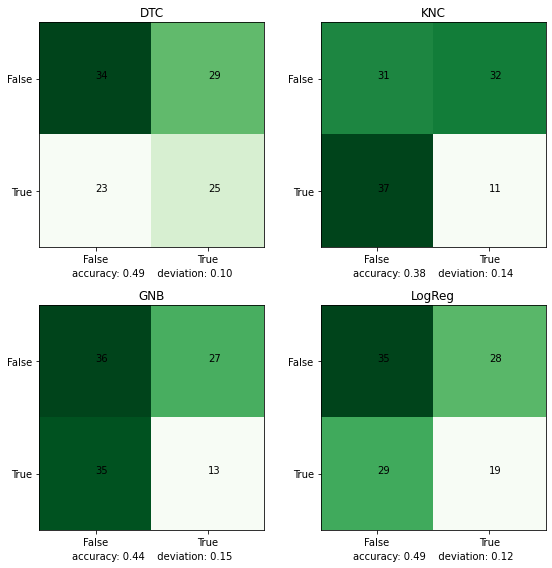

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(8, 8))

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(trainX_b,trainy_b)
axs[0,0].set_title('DTC')
draw_confusion_matrix(axs[0,0],dtc, testX_b, testy_b, cv=10)

knc = KNeighborsClassifier()
knc.fit(trainX_b,trainy_b)
axs[0,1].set_title('KNC')
draw_confusion_matrix(axs[0,1], knc, testX_b, testy_b, cv=10)

gnb = GaussianNB()
gnb.fit(trainX_b,trainy_b)
axs[1,0].set_title('GNB')
draw_confusion_matrix(axs[1,0], gnb, testX_b, testy_b, cv=10)

lor = LogisticRegression()
lor.fit(trainX_b,trainy_b)
axs[1,1].set_title('LogReg')
draw_confusion_matrix(axs[1,1], lor, testX_b, testy_b, cv=10)


fig.tight_layout()
plt.show()

There is an overall decreas in performance compaired to the prior dataset. DTC and KNC have the worst scaling.

LogReg perfors nearly as good as in the prior dataset and has with DTC the highest accuracy of 0.49

In [ ]:
fig, axs = plt.subplots(1, 1, figsize=(4, 4))
svc = SVC(kernel='linear')
svc.fit(trainX_b,trainy_b)
draw_confusion_matrix(ax1,svc, testX_b, testy_b, cv=10)
fig.tight_layout()
plt.show()

With the exp2b.csv file the SVN runs to long and I stopt it premature.

# **Task 1.3**

In [ ]:
df_e3a = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp3a.csv')
df_e3b = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp3b.csv')
df_e3c = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp3c.csv')
df_e3d = pd.read_csv('/content/drive/MyDrive/Master_AI/DataMining/Labs/Lab2/exp3d.csv')

In [ ]:
X_a, y_a = splitClassData(df_e3a)
X_b, y_b = splitClassData(df_e3b)
X_c, y_c = splitClassData(df_e3c)
X_d, y_d = splitClassData(df_e3d)

trainX_a, testX_a, trainy_a, testy_a = train_test_split(X_a, y_a, test_size=0.1, random_state=42)
trainX_b, testX_b, trainy_b, testy_b = train_test_split(X_b, y_b, test_size=0.1, random_state=42)
trainX_c, testX_c, trainy_c, testy_c = train_test_split(X_c, y_c, test_size=0.1, random_state=42)
trainX_d, testX_d, trainy_d, testy_d = train_test_split(X_d, y_d, test_size=0.1, random_state=42)

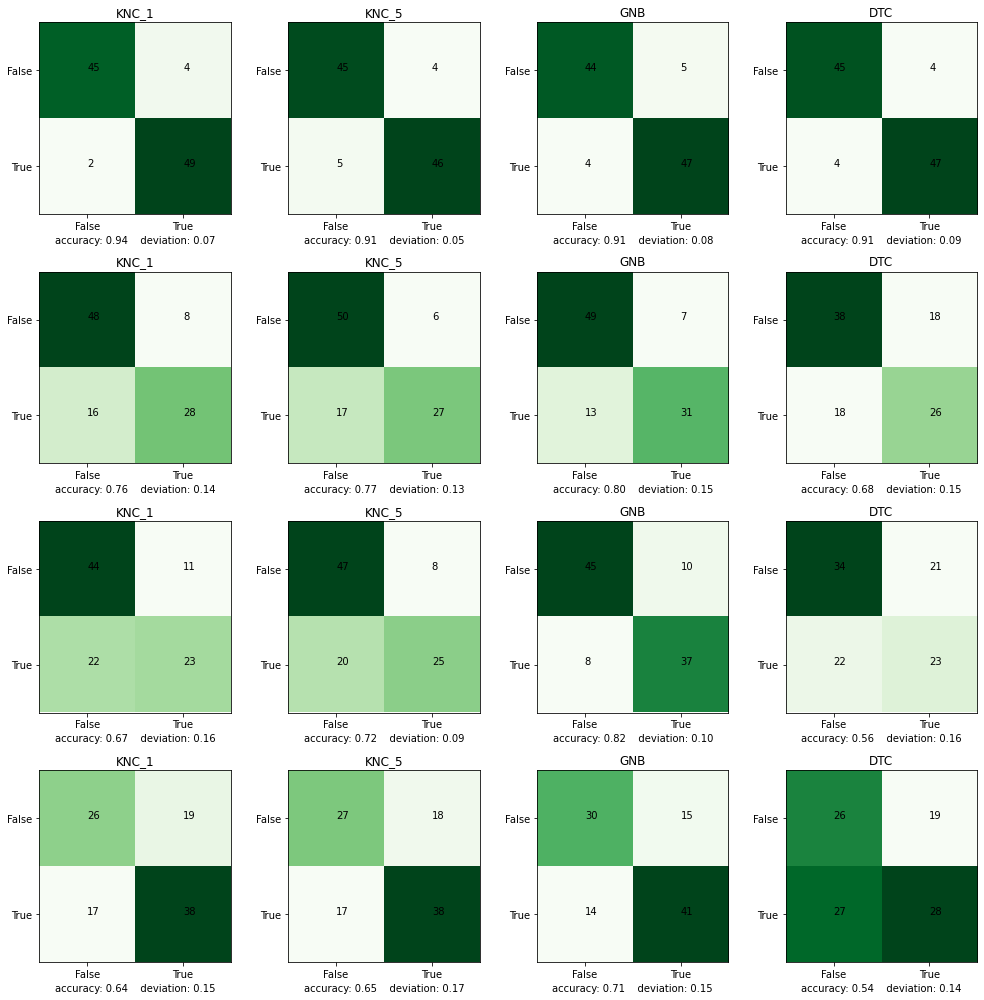

In [ ]:
fig, axs = plt.subplots(4, 4, figsize=(14, 14))

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(trainX_a,trainy_a)
axs[0,0].set_title('KNC_1')
draw_confusion_matrix(axs[0,0], knc, testX_a, testy_a, cv=10)

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(trainX_a,trainy_a)
axs[0,1].set_title('KNC_5')
draw_confusion_matrix(axs[0,1], knc, testX_a, testy_a, cv=10)

gnb = GaussianNB()
gnb.fit(trainX_a,trainy_a)
axs[0,2].set_title('GNB')
draw_confusion_matrix(axs[0,2], gnb, testX_a, testy_a, cv=10)

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(trainX_a,trainy_a)
axs[0,3].set_title('DTC')
draw_confusion_matrix(axs[0,3],dtc, testX_a, testy_a, cv=10)

######

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(trainX_b,trainy_b)
axs[1,0].set_title('KNC_1')
draw_confusion_matrix(axs[1,0], knc, testX_b, testy_b, cv=10)

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(trainX_b,trainy_b)
axs[1,1].set_title('KNC_5')
draw_confusion_matrix(axs[1,1], knc, testX_b, testy_b, cv=10)

gnb = GaussianNB()
gnb.fit(trainX_b,trainy_b)
axs[1,2].set_title('GNB')
draw_confusion_matrix(axs[1,2], gnb, testX_b, testy_b, cv=10)

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(trainX_b,trainy_b)
axs[1,3].set_title('DTC')
draw_confusion_matrix(axs[1,3],dtc, testX_b, testy_b, cv=10)

######

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(trainX_c,trainy_c)
axs[2,0].set_title('KNC_1')
draw_confusion_matrix(axs[2,0], knc, testX_c, testy_c, cv=10)

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(trainX_c,trainy_c)
axs[2,1].set_title('KNC_5')
draw_confusion_matrix(axs[2,1], knc, testX_c, testy_c, cv=10)

gnb = GaussianNB()
gnb.fit(trainX_c,trainy_c)
axs[2,2].set_title('GNB')
draw_confusion_matrix(axs[2,2], gnb, testX_c, testy_c, cv=10)

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(trainX_c,trainy_c)
axs[2,3].set_title('DTC')
draw_confusion_matrix(axs[2,3],dtc, testX_c, testy_c, cv=10)

######

knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(trainX_d,trainy_d)
axs[3,0].set_title('KNC_1')
draw_confusion_matrix(axs[3,0], knc, testX_d, testy_d, cv=10)

knc = KNeighborsClassifier(n_neighbors=5)
knc.fit(trainX_d,trainy_d)
axs[3,1].set_title('KNC_5')
draw_confusion_matrix(axs[3,1], knc, testX_d, testy_d, cv=10)

gnb = GaussianNB()
gnb.fit(trainX_d,trainy_d)
axs[3,2].set_title('GNB')
draw_confusion_matrix(axs[3,2], gnb, testX_d, testy_d, cv=10)

dtc = DecisionTreeClassifier(criterion='entropy')
dtc.fit(trainX_d,trainy_d)
axs[3,3].set_title('DTC')
draw_confusion_matrix(axs[3,3],dtc, testX_d, testy_d, cv=10)

fig.tight_layout()
plt.show()

(a)
For the first dataset of the four classifieres are nearly the same with KNC k=1 having the best performance.

With each bigger file the performance of the classifieres decrease. DTC hase the worst scaling (acc = 0.54) while GNB having the best (acc = 0.71).

For KNC having a k=5 give a small better performance than using a k=1.

---
(b)

With each increase of the featur vector the accuracy of the classifiers goes down. The effect on the deviation of is less prominet, but it also worsens with the bigger featur vector.
